In [1]:
import torch

import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn

print("GPU is available : {}".format(torch.cuda.is_available()))

GPU is available : True


In [2]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

In [4]:
trainset = torchvision.datasets.MNIST('mnist',
                                      train = True,
                                      download = True,
                                      transform = transform)

testset = torchvision.datasets.MNIST('mnist',
                                      train = False,
                                      download = True,
                                      transform = transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4579553.13it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 136994.44it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1273309.03it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2603598.30it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [5]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [6]:
print(trainset.data[0].shape)
print(trainset.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,  

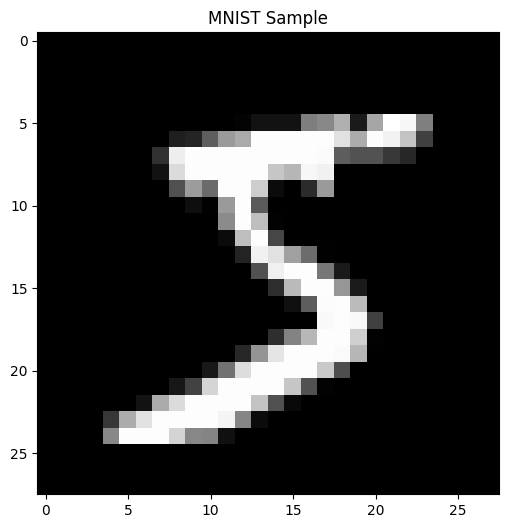

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#define i am show function
def imgshow(title="", image = None, size=6):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

  #convert the image into numpy array
image = trainset.data[0].numpy()
imgshow("MNIST Sample", image)

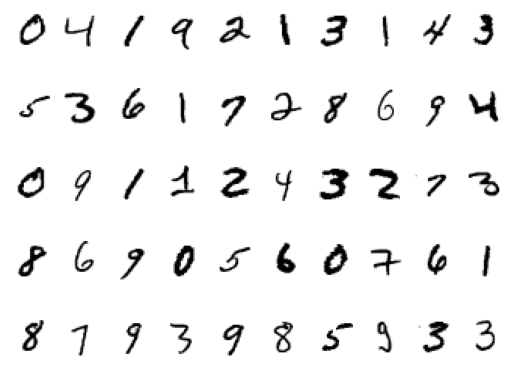

In [8]:
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images + 1):
  plt.subplot(5, 10, index)
  plt.axis('Off')
  plt.imshow(trainset.data[index], cmap='gray_r')


In [9]:
trainloader = torch.utils.data.DataLoader(trainset,
                                        batch_size = 128,
                                        shuffle = True,
                                        num_workers = 0)

testloader = torch.utils.data.DataLoader(trainset,
                                        batch_size = 128,
                                        shuffle = False,
                                        num_workers = 0)

In [10]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


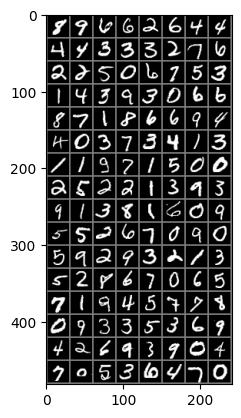

8 9 6 6 2 6 4 4 4 4 3 3 3 2 7 6 2 2 5 0 6 7 5 3 1 4 3 9 3 0 6 6 8 7 1 8 6 6 9 4 4 0 3 7 3 4 1 3 1 1 9 7 1 5 0 0 2 5 2 2 1 3 9 3 9 1 3 8 1 6 0 9 5 5 2 6 7 0 9 0 5 9 2 9 3 2 1 3 5 2 8 6 7 0 6 5 7 1 9 4 5 7 7 8 0 9 3 3 5 3 6 9 4 2 6 9 3 9 0 4 7 0 5 3 6 4 7 0


In [11]:
def imshow(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(" ".join('%1s' % labels[j].numpy() for j in range(128)))

In [12]:
nn.Conv2d(in_channels=1,
          out_channels=32,
          kernel_size=3,
          stride=1,
          padding=1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3,)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(64 * 12 * 12, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):

        x = F.relu(self.conv1(x))

        x = self.pool(F.relu(self.conv2(x)))


        x = x.view(x.size(0), -1)  # Flatten the tensor

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [15]:
import torch

# Assuming 'trainloader', 'testloader', 'net', 'criterion', 'optimizer', 'device' are already defined
epochs = 10

epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
    print(f'Starting Epoch: {epoch + 1}')

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 50 == 49:
            correct = 0
            total = 0
            with torch.no_grad():
                for data in testloader:
                    images, labels = data
                    images = images.to(device)
                    labels = labels.to(device)

                    outputs = net(images)

                    _, predicted = torch.max(outputs.data, 1)

                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

            accuracy = 100 * correct / total
            actual_loss = running_loss / 50
            print(f'Epoch: {epoch + 1}, Loss: {actual_loss:.3f}, Accuracy: {accuracy:.3f}, Mini-Batches Completed: {i + 1}')
            running_loss = 0.0

    # Log the metrics at the end of each epoch
    epoch_log.append(epoch + 1)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('Finished Training')


Starting Epoch: 1
Epoch: 1, Loss: 2.252, Accuracy: 60.515, Mini-Batches Completed: 50
Epoch: 1, Loss: 2.015, Accuracy: 70.757, Mini-Batches Completed: 100
Epoch: 1, Loss: 1.378, Accuracy: 80.842, Mini-Batches Completed: 150
Epoch: 1, Loss: 0.720, Accuracy: 85.170, Mini-Batches Completed: 200
Epoch: 1, Loss: 0.515, Accuracy: 87.017, Mini-Batches Completed: 250
Epoch: 1, Loss: 0.426, Accuracy: 87.863, Mini-Batches Completed: 300
Epoch: 1, Loss: 0.404, Accuracy: 89.147, Mini-Batches Completed: 350
Epoch: 1, Loss: 0.391, Accuracy: 89.278, Mini-Batches Completed: 400
Epoch: 1, Loss: 0.364, Accuracy: 90.030, Mini-Batches Completed: 450
Starting Epoch: 2
Epoch: 2, Loss: 0.336, Accuracy: 90.408, Mini-Batches Completed: 50
Epoch: 2, Loss: 0.325, Accuracy: 90.702, Mini-Batches Completed: 100
Epoch: 2, Loss: 0.317, Accuracy: 90.635, Mini-Batches Completed: 150
Epoch: 2, Loss: 0.310, Accuracy: 91.337, Mini-Batches Completed: 200
Epoch: 2, Loss: 0.282, Accuracy: 91.988, Mini-Batches Completed: 250


In [16]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

In [16]:
# Loading one mini-batch
dataiter = iter(testloader)
images, labels = dataiter.next()

# Display images using torchvision's utils.make_grid()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ',''.join('%1s' % labels[j].numpy() for j in range(128)))

In [17]:
# Create an instance of the model and move it (memory and operations) to the CUDA device.
net = Net()
net.to(device)

# Load weights from the specified path
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [23]:
## Let's forward propagate one mini-batch and get the predicted outputs
# We use the Python function iter to return an iterator for our train_loader object
test_iter = iter(testloader)

# We use next to get the first batch of data from our iterator
images, labels = next(test_iter)

# Move our data to GPU
images = images.to(device)
labels = labels.to(device)

outputs = net(images)

# Get the class predictions using torch.max
_, predicted = torch.max(outputs, 1)

# Print our 128 predictions
print('Predicted: ', ''.join('%1s' % predicted[j].cpu().numpy() for j in range(128)))

Predicted:  50419213143536172869409112432738690560761879398593307498094144604561001716302117802678390467468078315717116302931104920020271864


In [19]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')

Accuracy of the network on the 10000 test images: 98.3%


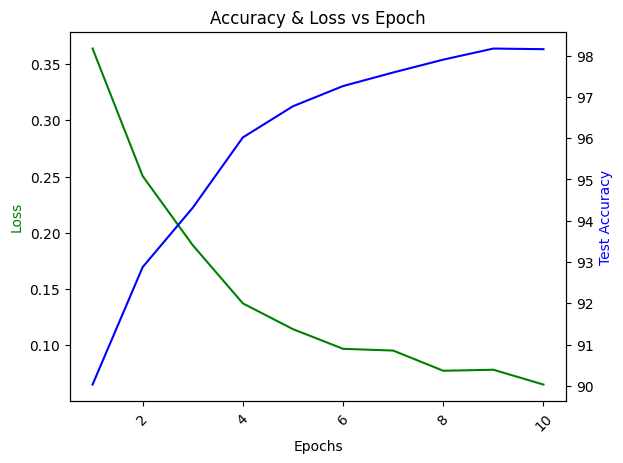

In [20]:
# To create a plot with secondary y-axis we need to create a subplot
fig, ax1 = plt.subplots()

# Set title and x-axis label rotation
plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

# We use twinx to create a plot a secondary y axis
ax2 = ax1.twinx()

# Create plot for loss_log and accuracy_log
ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

# Set labels
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()

In [21]:
epoch_log = list(range(1,11))
epoch_log

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [22]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]